## Breast Cancer prediction

To predict if a tumor is malignant or benign.
2 classes: 
**2.0: Bening and 4.0=Malignant**

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from tqdm import tqdm
import tensorflow_datasets as tfds
tf.get_logger().setLevel('ERROR')

In [2]:
# Load Data
DATASET_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
data_file = tf.keras.utils.get_file("breast_cancer.csv", DATASET_URL)
col_names = ["id", "clump_thickness", "un_cell_size", "un_cell_shape", "marginal_adheshion", "single_eph_cell_size", "bare_nuclei", "bland_chromatin", "normal_nucleoli", "mitoses", "class"]
df = pd.read_csv(data_file, names=col_names, header=None)

In [3]:
df.head()

,id,clump_thickness,un_cell_size,un_cell_shape,marginal_adheshion,single_eph_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
df.pop("id")
df

,clump_thickness,un_cell_size,un_cell_shape,marginal_adheshion,single_eph_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [5]:
#remove some unknown dates.
df=df[df["bare_nuclei"] != "?"]
df

,clump_thickness,un_cell_size,un_cell_shape,marginal_adheshion,single_eph_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [6]:
df.bare_nuclei = pd.to_numeric(df.bare_nuclei)
df.bare_nuclei

C:\Users\Carmona\anaconda3\lib\site-packages\pandas\core\generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nuclei, Length: 683, dtype: int64

<AxesSubplot:>

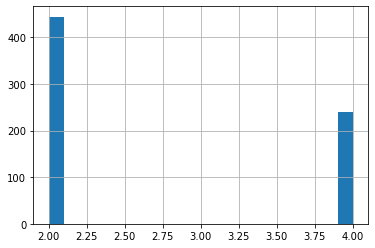

In [7]:
# look the classes.
df["class"].hist(bins=20)

In [8]:
#we're going to change the 2 for 0 and 4 for 1:
df["class"]= np.where(df["class"]==2, 0, 1)
df

C:\Users\Carmona\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,clump_thickness,un_cell_size,un_cell_shape,marginal_adheshion,single_eph_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [9]:
train,test= train_test_split(df,test_size=0.2)

In [10]:
train_stats= train.describe()
train_stats.pop("class")
train_stats= train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
clump_thickness,546.0,4.435897,2.784049,1.0,2.0,4.0,6.00,10.0
un_cell_size,546.0,3.148352,3.051540,1.0,1.0,1.0,4.75,10.0
un_cell_shape,546.0,3.227106,2.987386,1.0,1.0,1.0,5.00,10.0
marginal_adheshion,546.0,2.794872,2.837180,1.0,1.0,1.0,4.00,10.0
single_eph_cell_size,546.0,3.236264,2.230943,1.0,2.0,2.0,4.00,10.0
bare_nuclei,546.0,3.518315,3.629218,1.0,1.0,1.0,5.75,10.0
bland_chromatin,546.0,3.459707,2.458318,1.0,2.0,3.0,4.00,10.0
normal_nucleoli,546.0,2.884615,3.049960,1.0,1.0,1.0,4.00,10.0
mitoses,546.0,1.542125,1.627477,1.0,1.0,1.0,1.00,10.0


In [11]:
#labels
train_y= train.pop("class")
test_y= test.pop("class")

In [12]:
# preprocess
def norm(x):
    return (x-train_stats["mean"])/ train_stats["std"]

In [13]:
norm_train_x= norm(train)
norm_test_x = norm(test)
norm_train_x

,clump_thickness,un_cell_size,un_cell_shape,marginal_adheshion,single_eph_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses
304,1.280187,-0.048615,0.258719,2.187076,-0.105903,1.785973,-0.187001,0.037832,-0.333107
526,-0.156570,-0.704022,-0.745503,-0.632625,-0.554144,-0.693900,-1.000565,-0.617915,-0.333107
155,0.202619,0.606791,0.593460,1.129688,-0.105903,1.785973,-0.187001,-0.617915,-0.333107
547,-0.874948,-0.704022,-0.745503,-0.632625,-1.002385,-0.693900,-1.000565,-0.617915,-0.333107
48,-0.156570,-0.704022,-0.745503,0.072300,-0.554144,-0.693900,-0.187001,-0.617915,-0.333107
...,...,...,...,...,...,...,...,...,...
177,0.202619,2.245308,2.267164,0.072300,2.135302,-0.693900,0.626564,2.332943,0.895789
593,0.202619,-0.704022,-0.410763,-0.632625,-0.554144,-0.693900,-1.000565,-0.617915,-0.333107
74,1.998565,0.934495,0.258719,-0.632625,-0.105903,0.132724,-0.187001,-0.290042,0.895789
503,-0.156570,-0.704022,-0.745503,-0.632625,-0.554144,-0.693900,-0.187001,-0.617915,-0.333107


In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices((norm_train_x.values, train_y.values))
test_dataset = tf.data.Dataset.from_tensor_slices((norm_test_x.values, test_y.values))
train_dataset

<TensorSliceDataset shapes: ((9,), ()), types: (tf.float64, tf.int32)>

In [15]:
batch_size= 32
train_dataset= train_dataset.shuffle(buffer_size=len(train)).batch(batch_size)
test_dataset= test_dataset.batch(batch_size)

In [16]:
#test
a= enumerate(train_dataset)
print(len(list(a)))

18


In [17]:
# define model
def base_model():
    inputs = tf.keras.layers.Input(shape=(len(train.columns)))
    x = tf.keras.layers.Dense(128, activation='relu')(inputs)
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

model = base_model()

In [18]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
loss_object = tf.keras.losses.BinaryCrossentropy()

In [19]:
outputs = model(norm_test_x.values)
loss_value = loss_object(y_true=test_y.values, y_pred=outputs)
print("Loss before training %.4f" % loss_value.numpy())

Loss before training 0.6784


In [20]:
def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title(title)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()

C:\Users\Carmona\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\Carmona\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


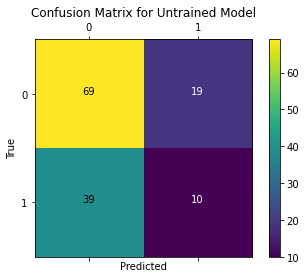

In [21]:
# plot the confusion matrix to visualize the true outputs against the outputs predicted by the model
plot_confusion_matrix(test_y.values, tf.round(outputs), title='Confusion Matrix for Untrained Model')

In [22]:
# now define metrics
class F1Score(tf.keras.metrics.Metric):

    def __init__(self, name='f1_score', **kwargs):
        '''initializes attributes of the class'''
        
        # call the parent class init
        super(F1Score, self).__init__(name=name, **kwargs)

        # Initialize Required variables
        # true positives
        self.tp = tf.Variable(0, dtype = 'int32')
        # false positives
        self.fp = tf.Variable(0, dtype = 'int32')
        # true negatives
        self.tn = tf.Variable(0, dtype = 'int32')
        # false negatives
        self.fn = tf.Variable(0, dtype = 'int32')

    def update_state(self, y_true, y_pred, sample_weight=None):
        
        # Calulcate confusion matrix.
        conf_matrix = tf.math.confusion_matrix(y_true, y_pred, num_classes=2)
        
        # Update values of true positives, true negatives, false positives and false negatives
        # from confusion matrix.
        self.tn.assign_add(conf_matrix[0][0])
        self.tp.assign_add(conf_matrix[1][1])
        self.fp.assign_add(conf_matrix[0][1])
        self.fn.assign_add(conf_matrix[1][0])

    def result(self):

        # Calculate precision
        if (self.tp + self.fp == 0):
            precision = 1.0
        else:
            precision = self.tp / (self.tp + self.fp)
        # Calculate recall
        if (self.tp + self.fn == 0):
            recall = 1.0
        else:
            recall = self.tp / (self.tp + self.fn)

        # Return F1 Score
        f1_score = 2 * ((precision * recall) / (precision + recall))
    
        return f1_score

    def reset_states(self):
        
        # The state of the metric will be reset at the start of each epoch.
        self.tp.assign(0)
        self.tn.assign(0) 
        self.fp.assign(0)
        self.fn.assign(0)

In [23]:
# Test Code:

test_F1Score = F1Score()

test_F1Score.tp = tf.Variable(2, dtype = 'int32')
test_F1Score.fp = tf.Variable(5, dtype = 'int32')
test_F1Score.tn = tf.Variable(7, dtype = 'int32')
test_F1Score.fn = tf.Variable(9, dtype = 'int32')
test_F1Score.result()

<tf.Tensor: shape=(), dtype=float64, numpy=0.2222222222222222>

In [24]:
train_f1score_metric = F1Score()
val_f1score_metric = F1Score()

train_acc_metric = tf.keras.metrics.BinaryAccuracy()
val_acc_metric = tf.keras.metrics.BinaryAccuracy()

In [25]:
# applies the gradients to the trainable model weights
def apply_gradient(optimizer, loss_object, model, x, y):
    
    with tf.GradientTape() as tape:
        logits = model(x)
        loss_value = loss_object(y_true=y,y_pred=logits)
  
    gradients = tape.gradient(loss_value,model.trainable_weights)
    optimizer.apply_gradients(zip(gradients,model.trainable_weights))
  
    return logits, loss_value

In [26]:
def train_data_for_one_epoch(train_dataset, optimizer, loss_object, model, 
                             train_acc_metric, train_f1score_metric, verbose=True):
 
    losses = []

    #Iterate through all batches of training data
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):

        #Calculate loss and update trainable variables using optimizer
        logits, loss_value = apply_gradient(optimizer,loss_object,model,x_batch_train,y_batch_train)#None, None, None, None, None)
        losses.append(loss_value)

        #Round off logits to nearest integer and cast to integer for calulating metrics
        logits = tf.round(logits)
        logits = tf.cast(logits, 'int64')

        #Update the training metrics
        train_acc_metric.update_state(y_batch_train,logits)
        train_f1score_metric.update_state(y_batch_train,logits)

        #Update progress
        if verbose:
            print("Training loss for step %s: %.4f" % (int(step), float(loss_value)))
    
    return losses

In [27]:
# The following function calculates the loss on test dataset
# and updates the states of the validation metrics.

def perform_validation():
    losses = []

    #Iterate through all batches of validation data.
    for x_val, y_val in test_dataset:

        #Calculate validation loss for current batch.
        val_logits = model(x_val) 
        val_loss = loss_object(y_true=y_val, y_pred=val_logits)
        losses.append(val_loss)

        #Round off and cast outputs to either  or 1
        val_logits = tf.cast(tf.round(model(x_val)), 'int64')

        #Update validation metrics
        val_acc_metric.update_state(y_val, val_logits)
        val_f1score_metric.update_state(y_val, val_logits)
        
    return losses

In [28]:
# Iterate over epochs.
epochs = 5
epochs_val_losses, epochs_train_losses = [], []

for epoch in range(epochs):
    print('Start of epoch %d' % (epoch,))
    #Perform Training over all batches of train data
    losses_train = train_data_for_one_epoch(train_dataset, optimizer, loss_object, model, train_acc_metric, train_f1score_metric)

    # Get results from training metrics
    train_acc = train_acc_metric.result()
    train_f1score = train_f1score_metric.result()

    #Perform validation on all batches of test data
    losses_val = perform_validation()

    # Get results from validation metrics
    val_acc = val_acc_metric.result()
    val_f1score = val_f1score_metric.result()

    #Calculate training and validation losses for current epoch
    losses_train_mean = np.mean(losses_train)
    losses_val_mean = np.mean(losses_val)
    epochs_val_losses.append(losses_val_mean)
    epochs_train_losses.append(losses_train_mean)

    print('\n Epcoh %s: Train loss: %.4f  Validation Loss: %.4f, Train Accuracy: %.4f, Validation Accuracy %.4f, Train F1 Score: %.4f, Validation F1 Score: %.4f' % (epoch, float(losses_train_mean), float(losses_val_mean), float(train_acc), float(val_acc), train_f1score, val_f1score))

    #Reset states of all metrics
    train_acc_metric.reset_states()
    val_acc_metric.reset_states()
    val_f1score_metric.reset_states()
    train_f1score_metric.reset_states()

Start of epoch 0
Training loss for step 0: 0.6547
Training loss for step 1: 0.6022
Training loss for step 2: 0.4895
Training loss for step 3: 0.4916
Training loss for step 4: 0.3922
Training loss for step 5: 0.4379
Training loss for step 6: 0.3400
Training loss for step 7: 0.3343
Training loss for step 8: 0.2887
Training loss for step 9: 0.2040
Training loss for step 10: 0.2912
Training loss for step 11: 0.2716
Training loss for step 12: 0.1997
Training loss for step 13: 0.2009
Training loss for step 14: 0.1973
Training loss for step 15: 0.1704
Training loss for step 16: 0.1429
Training loss for step 17: 0.0737

 Epcoh 0: Train loss: 0.3213  Validation Loss: 0.1106, Train Accuracy: 0.9184, Validation Accuracy 1.0000, Train F1 Score: 0.8726, Validation F1 Score: 1.0000
Start of epoch 1
Training loss for step 0: 0.1459
Training loss for step 1: 0.1398
Training loss for step 2: 0.0907
Training loss for step 3: 0.1417
Training loss for step 4: 0.2016
Training loss for step 5: 0.1170
Traini

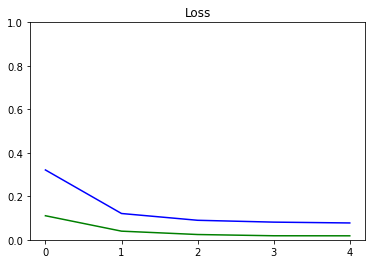

In [29]:
import matplotlib.ticker as mticker

def plot_metrics(train_metric, val_metric, metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.plot(train_metric,color='blue',label=metric_name)
    plt.plot(val_metric,color='green',label='val_' + metric_name)

plot_metrics(epochs_train_losses, epochs_val_losses, "Loss", "Loss", ylim=1.0)

### We plot the confusion matrix to visualize the true values against the values predicted by the model.

C:\Users\Carmona\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\Carmona\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


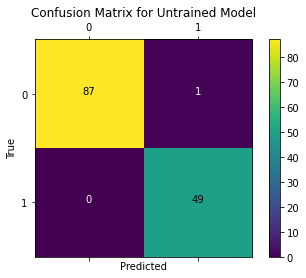

In [30]:
test_outputs = model(norm_test_x.values)
plot_confusion_matrix(test_y.values, tf.round(test_outputs), title='Confusion Matrix for Untrained Model')